# PARTE PRACTICA PRIMER PARCIAL


*   Johan Smith Salazar Giraldo - 2211517
*   Diego Alonso Santiago Villar - 2211631

# INTRODUCCIÓN

El análisis del desempeño académico de los estudiantes en pruebas estandarizadas como las Pruebas Saber 11 (ICFES) en Colombia es fundamental para comprender las dinámicas educativas y socioeconómicas del país. En particular, la relación entre el nivel socioeconómico de los estudiantes y sus puntajes en áreas clave como Lectura Crítica, Matemáticas, Ciencias Naturales, Ciencias Sociales y Ciudadanas, e Inglés ha sido objeto de numerosos estudios que buscan identificar cómo las desigualdades sociales se reflejan en los resultados educativos.

Este informe de estadística tiene como objetivo explorar y cuantificar la relación entre el nivel socioeconómico de los estudiantes evaluados en las pruebas ICFES del año 2019 y sus puntajes en las áreas mencionadas, utilizando dos enfoques metodológicos: el modelo lineal múltiple y un modelo de red neuronal multicapa y también utilizando los coeficientes de correlación de Kendall y Spearman.

Para empezar, vamos primero a cargar la base de datos:

In [1]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [3]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')
datos_icfes.head()

<ipython-input-3-2cde59e64ccc>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR


Una vez se haya cargado la base de datos, podemor ver que nombre reciben las columnas de la base de datos.

In [4]:
datos_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

Según la información, se puede observar que hay variables de tipo float64, int64, objecto, por ejemplo, la variable Puntaje Ingles es de tipo float64, la variable puntaje global es de tipo int64, etc.

In [5]:
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

Para el análisis estadístico, hay que eliminar los valores faltantes, esto se hace mediante el siguiente código:

In [6]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

Teniendo en cuenta que eliminamos los valores faltantes, entonces podemos hacer la tabla de regresión donde se nota que se borran unas filas con respecto a la primera tabla.

In [7]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0


Seguido a la tabla de regresión con la eliminación de valores faltantes, podemos hacer los histogramas de cada una de las variables, como se muestra a continuación:

**Histograma ESTU_INSE_INDIVIDUAL**

<Axes: >

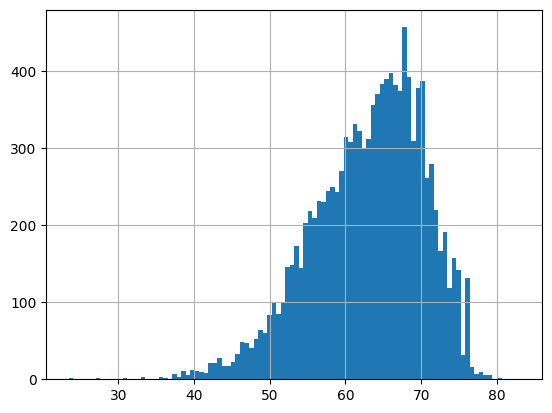

In [8]:
tabla_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins=100)

**Histograma PUNT_LECTURA_CRITICA**

<Axes: >

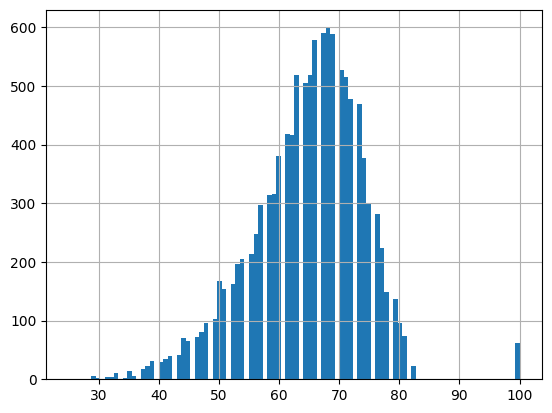

In [9]:
tabla_regresion['PUNT_LECTURA_CRITICA'].hist(bins=100)

**Histograma PUNT_MATEMATICAS**

<Axes: >

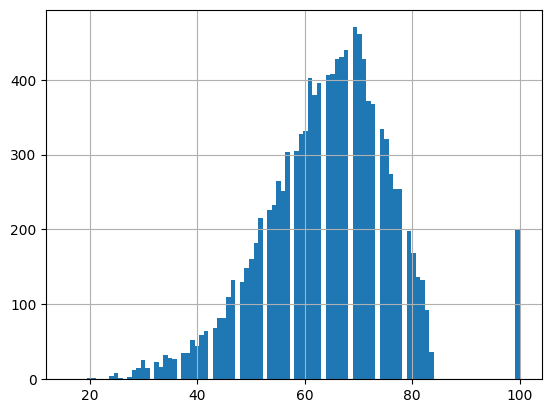

In [10]:
tabla_regresion['PUNT_MATEMATICAS'].hist(bins=100)

**Histograma PUNT_C_NATURALES**

<Axes: >

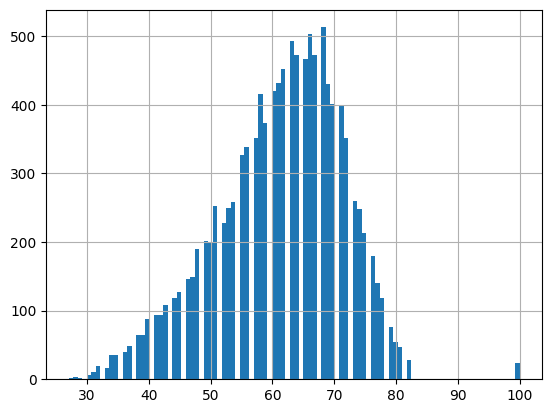

In [11]:
tabla_regresion['PUNT_C_NATURALES'].hist(bins=100)

**Histograma PUNT_SOCIALES_CIUDADANAS**

<Axes: >

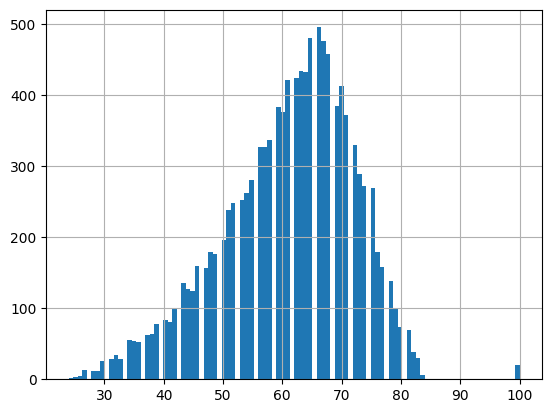

In [12]:
tabla_regresion['PUNT_SOCIALES_CIUDADANAS'].hist(bins=100)

**Histograma PUNT_INGLES**

<Axes: >

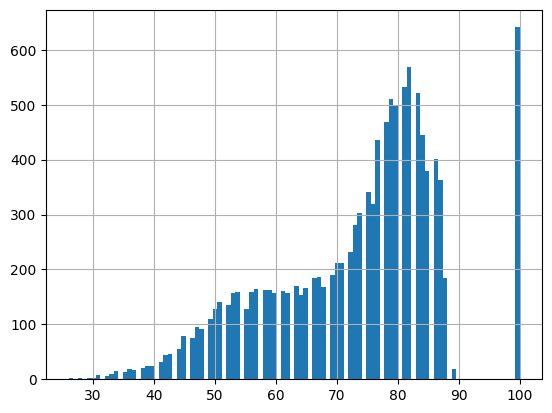

In [13]:
tabla_regresion['PUNT_INGLES'].hist(bins=100)

Después de realizar los respectivos histogramas de cada una de las variables, se observan valores no representativos los cuales se pueden eliminar en la siguiente línea de código.

In [14]:
tabla_regresion1 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']<90) & (tabla_regresion['PUNT_LECTURA_CRITICA']<90) & (tabla_regresion['PUNT_MATEMATICAS']<90) & (tabla_regresion['PUNT_C_NATURALES']<90) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<90) & (tabla_regresion['PUNT_INGLES']<90)]
tabla_regresion1.head(5)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


**Diagramas de Dispersión**\
Los diagramas de dispersión son herramientas visuales muy útiles para identificar la relación entre dos variables y analizar patrones en los datos.
Un diagrama de dispersión puede mostrar cómo se relacionan estas dos variables, revelando correlaciones que pueden ayudar a comprender mejor los resultados.

**Diagrama de Dispersión:Puntaje Lectura Critica vs Nivel Socioeconómico**

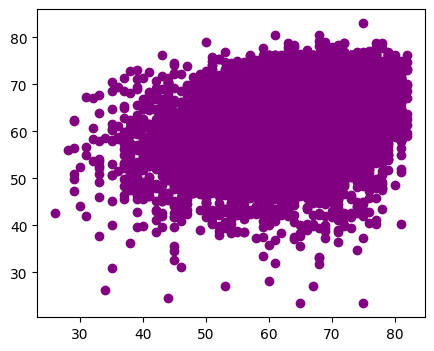

In [57]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c = "purple")
plt.show()

Este diagrama de dispersión muestra que las dos variables que se grafican no presentan una correlación clara y fuerte. Sería útil calcular el coeficiente de correlación entre las variables para confirmar esta observación, o probar si existe alguna relación no lineal que no se puede ver de forma evidente en este gráfico.

**Diagrama de Dispersión:Puntaje Lectura Matemáticas vs Nivel Socioeconómico**

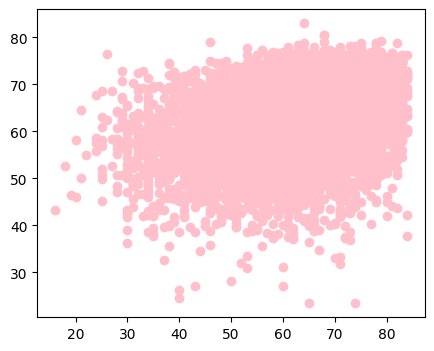

In [56]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c = "pink")
plt.show()

El diagrama de dispersión muestra que las dos variables que se grafican no presentan una correlación clara y fuerte.

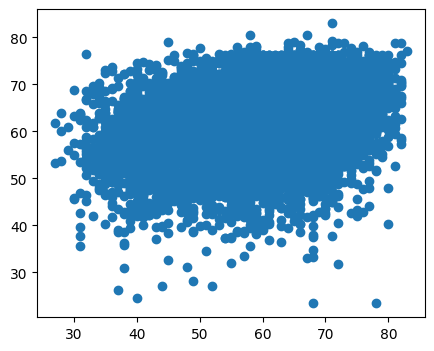

In [17]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.show()

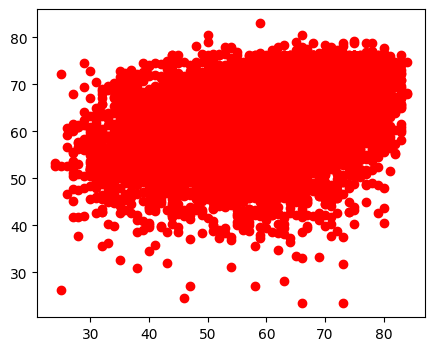

In [55]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c = "red")
plt.show()

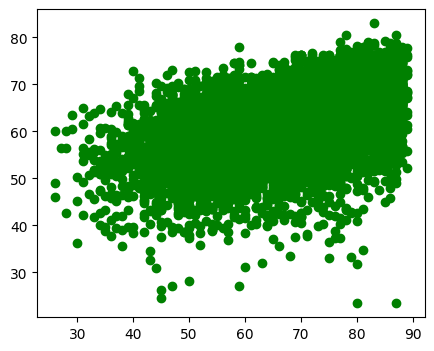

In [54]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c = "green")
plt.show()

Luego de haber realizado distintos diagramas de dispersión, se puede decir que no existe una correlación fuerte y clara que nos permita determinar que variables son explicativas y cuál es la variable respuesta, aún así, se procede a calcular el coeficiente de determinación para poder aplicar ver que tanto se ajusta un modelo de regresión lineal.

**Coeficiente de Determinación**\
Es una medida estadística utilizada para evaluar qué tan bien un modelo de regresión lineal ajusta los datos. Se va a calcular el coeficiente de determinación para saber el porcentaje de la variabilidad total de la variable dependiente (o variable respuesta) está explicado por las variables independientes (o explicativos) del modelo.

In [20]:
X=tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis=1)
Y=tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split (X,Y,test_size=0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8008,61,59,51,52,71.0
8252,42,42,56,45,28.0
3787,66,81,61,62,67.0
6217,59,66,48,38,67.0


Se tiene que para calcular el coeficiente de determinación se utiliza una función llamada **"score"** y este coeficiente de determinación se calcula para los datos de validación.

In [21]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX,trainY)
Pred_lineal = regresion.predict(testX)
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.27967527754225285

In [22]:
#SIN LECTURA CRITICA
X1 = tabla_regresion1[['PUNT_MATEMATICAS','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX1, testX1, trainY1, testY1 = train_test_split (X1,Y1,test_size=0.2, random_state = 0)
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainX1,trainY1)
Pred_lineal1 = regresion1.predict(testX1)
r2_lineal1 = regresion1.score(testX1, testY1)
r2_lineal1

0.27870582912247066

Después de hacer el cálculo sin tomar esta variable nos da 0.27870582912247066.


In [23]:
#SIN MATEMATICAS
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX2, testX2, trainY2, testY2 = train_test_split (X2,Y2,test_size=0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainX2,trainY2)
Pred_lineal2 = regresion2.predict(testX2)
r2_lineal2 = regresion2.score(testX2, testY2)
r2_lineal2

0.28008110081347015

In [24]:
#SIN C_NATURALES
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX3, testX3, trainY3, testY3 = train_test_split (X3,Y3,test_size=0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainX3,trainY3)
Pred_lineal3 = regresion3.predict(testX3)
r2_lineal3 = regresion3.score(testX3, testY3)
r2_lineal3

0.2795748119525783

In [25]:
#SIN C_SOCIALES_CIUDADANAS
X4 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX4, testX4, trainY4, testY4 = train_test_split (X4,Y4,test_size=0.2, random_state = 0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainX4,trainY4)
Pred_lineal4 = regresion4.predict(testX4)
r2_lineal4 = regresion4.score(testX4, testY4)
r2_lineal4

0.2796312154316435

In [26]:
#SIN INGLES
X5 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX5, testX5, trainY5, testY5 = train_test_split (X5,Y5,test_size=0.2, random_state = 0)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(trainX5,trainY5)
Pred_lineal5 = regresion5.predict(testX5)
r2_lineal5 = regresion5.score(testX5, testY5)
r2_lineal5

0.13708908232818573

Después de haber mostrado y calculado estos valores, se toma como conclusión que, el puntaje de inglés es una variable explicativa al ser el valor que más está alejado del coeficiente de determinación, la otra variable explicativa es el puntaje de lectura crítica, ya que habiendo hecho un cálculo exhaustivo, se observa que este valor es el más alejado del coeficiente de correlación con respecto a las otras variables.

# Modelo de Regresión

La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes. A continuación, se tomaron dos variables explicativas (PUNT_LECTURA_CRITICA, PUNT_INGLES) y una variable respuesta (ESTU_INSE_INDIVIDUAL).

In [27]:
XY, Z = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_INGLES']], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split (XY,Z,test_size=0.2, random_state = 0)
trainXY.head(4)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
8008,61,71.0
8252,42,28.0
3787,66,67.0
6217,59,67.0


In [28]:
modelo1 = LinearRegression()
modelo1.fit(trainXY,trainZ) #entrenamos el modelo

LinearRegression()

In [29]:
modelo1.score(testXY, testZ)

0.27992851068329294

In [30]:
array = modelo1.coef_
array

array([-0.02460622,  0.33932391])



*   El coeficiente negativo indica que la primera variable independiente (PUNT_LECTURA_CRITICA) tiene un efecto negativo sobre la variable dependiente. Cuando (PUNT_LECTURA_CRITICA) aumenta, la variable dependiente disminuye ligeramente.
*   El coeficiente positivo indica que la segunda variable independiente (PUNT_INGLES) tiene un efecto positivo sobre la variable dependiente. Cuando
(PUNT_INGLES) aumenta, la variable dependiente aumenta significativamente.




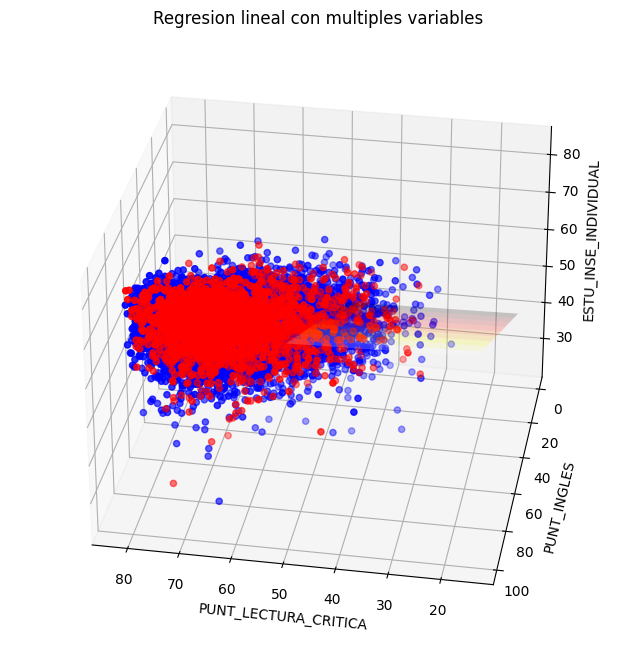

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50 ,num=10), np.linspace(0, 100 ,num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_
ax.plot_surface(xx, yy, plano_reg, alpha=0.2 ,cmap='hot')
ax.scatter(trainXY['PUNT_LECTURA_CRITICA'], trainXY['PUNT_INGLES'], trainZ, color='blue',s=20)
ax.scatter(testXY['PUNT_LECTURA_CRITICA'], testXY['PUNT_INGLES'], testZ, color='red',s=20)
ax.view_init(elev=30.,azim=100)
ax.set_xlabel('PUNT_LECTURA_CRITICA')
ax.set_ylabel('PUNT_INGLES')
ax.set_zlabel('ESTU_INSE_INDIVIDUAL')
ax.set_title('Regresion lineal con multiples variables')
plt.show()

Según el plano dispersión se observa que existe una correlación positiva entre los puntajes en lectura crítica y en inglés, lo que es lógico, ya que ambas habilidades pueden estar relacionadas. Además, parece que el índice de nivel socioeconómico tiene un impacto moderado, con estudiantes de niveles socioeconómicos más altos tendiendo a obtener mejores puntajes en estas materias, pero no de manera tan marcada. Esto puede indicar que, aunque el nivel socioeconómico influye en los resultados académicos, no es el único factor que determina el rendimiento en estas áreas.

# Red Neuronal de Perceptrón Multicapa

Una red neuronal de perceptrón multicapa (MLP) es un modelo que puede resolver problemas complejos al aprender patrones no lineales a partir de los datos.

In [46]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100,100),
                       max_iter=500, activation='relu',
                       solver='adam', learning_rate='invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [33]:
red.score(testX,testY)

0.27979317378101676

In [34]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [35]:
no_obs = np.array([[50, 30, 35, 45, 50]])
print('Se espera que el nivel socioeconómico sea:', red.predict(no_obs), 'bajo el perceptrón multicapa y',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el nivel socioeconómico sea: [54.60171637] bajo el perceptrón multicapa y [55.03875101] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Coeficientes de Corelacción: Spearman y Kendall**

In [36]:
pearman_corre, _ = spearmanr(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corre, _ = kendalltau(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f'Los coeficientes de correlación de Spearman y Kendall son respectivamente {pearman_corre}, {kendall_corre}')

Los coeficientes de correlación de Spearman y Kendall son respectivamente 0.3374003237263829, 0.23227379710032733


In [37]:
pearman_corre, _ = spearmanr(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corre, _ = kendalltau(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f'Los coeficientes de correlación de Spearman y Kendall son respectivamente {pearman_corre}, {kendall_corre}')

Los coeficientes de correlación de Spearman y Kendall son respectivamente 0.5643625792430149, 0.3943616513896971


Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174.  

*   X y Y son independientes o no están correlacionadas:  $\eta(X,Y) \approx 0, \kappa(X,Y) \approx 0$

*   Y depende insignificantemente de X o X y Y están insignificantmente correlacionadas si  $0 < \eta(X,Y) \vert < 0.2$, $0< \vert \kappa(X,Y) \vert < 0.2$
*   Y depende discretamente de X o X y Y están discretamente correlacionadas si $0.2 < \eta(X,Y) \vert < 0.4$, $0.2 < \vert \kappa(X,Y) \vert < 0.4$
*   Y depende moderadamente de X o X y Y están moderadamente correlacionadas si $0.4 < \eta(X,Y) \vert < 0.6$, $0.4 < \vert \kappa(X,Y) \vert < 0.6$
*   Y depende sustancialmente de X o X y Y están sustancialmente correlacionadas si $0.6 < \eta(X,Y) \vert < 0.8$, $0.6 < \vert \kappa(X,Y) \vert < 0.8$
*   Y depende fuertemente de X o X y Y están fuertmente correlacionadas si $0.8 < \eta(X,Y) \vert < 1$, $0.8 < \vert \kappa(X,Y) \vert < 1$


De acuerdo con los coeficientes de correlación de Spearman y de Kendall se determina que el puntaje del índice de nivel socioeconómico en las pruebas ICFES de Colombia y el puntaje de lectura crítica están discretamente correlacionadas. Pues si hacemos un análisis detallado de correlación entre el puntaje del nivel socioeconómico en las pruebas y el puntaje de lectura crítica muestra una débil relación.


También, de acuerdo con los coeficientes de correlación de Spearman y de Kendall se determina que el puntaje del nivel socioeconómico en las pruebas y el puntaje de inglés están moderadamente correlacionadas.


**Valores Faltantes**

In [43]:
tabla_regresion2 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']>80) & (tabla_regresion['PUNT_LECTURA_CRITICA']<90) & (tabla_regresion['PUNT_MATEMATICAS']<90) & (tabla_regresion['PUNT_C_NATURALES']<90) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<90) & (tabla_regresion['PUNT_INGLES']<90)]
tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,83.007321,75,64,71,59,83.0
8910,80.453570,61,68,67,50,78.0
10650,80.453570,68,68,58,66,87.0


In [51]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
red.predict(X_no)

array([66.0466529 , 65.35380144, 68.40433893])

In [53]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)
tabla_regresion2

<ipython-input-53-cfa1f1418c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,66.046653,75,64,71,59,83.0
8910,65.353801,61,68,67,50,78.0
10650,68.404339,68,68,58,66,87.0


# CONCLUSION

El análisis de los puntajes del ICFES en Colombia y su relación con el nivel socioeconómico individual de los estudiantes revela una tendencia significativa: el nivel socioeconómico influye en el rendimiento académico, aunque no es el único determinante del éxito en las pruebas. Los estudiantes provenientes de entornos socioeconómicos más altos tienden a obtener mejores puntajes en asignaturas como lectura crítica, inglés y otras áreas evaluadas en el examen, lo que sugiere que el acceso a mejores recursos educativos, apoyo familiar y oportunidades de aprendizaje extras escolares pueden estar asociados con mejores resultados.

Sin embargo, los datos también muestran una importante dispersión, donde algunos estudiantes de bajos niveles socioeconómicos logran obtener buenos puntajes, lo que indica que, aunque el contexto económico es un factor relevante, existen otros elementos como el esfuerzo individual, el entorno escolar y las políticas educativas que pueden mitigar estas disparidades.

# REFERENCIAS


*    Montero Granados. R (2016): Modelos de regresión lineal múltiple.
Documentos de Trabajo en Economía Aplicada. Universidad de Granada. España.
*   Tabares, H., Branch, J., & Valencia, J. (2006). Generación dinámica de la topología de una red neuronal artificial del tipo perceptron multicapa. Revista Facultad de Ingeniería Universidad de Antioquia, (38), 146-162.

